In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.utils import plot_model
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [6]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

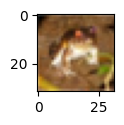

In [8]:
plt.figure(figsize = (1,1))
plt.imshow(x_train[0])

In [7]:
y_train[0]

array([6], dtype=uint8)

In [10]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse'
'ship','truck']

In [ ]:
# def plot_img(data,labels):
#     num_img =12

#     plt.subplots(figsize=(8,6))
#     for  i in range(0,num_img):
#         plt.subplot(3,4,i+1)
#         plt.xticks([])
#         plt.yticks([])

#         rand = np.random.randint(0,len(data))
#         img = data[rand]
#         label = labels[rand]
        
#         plt.imshow(img,cmap='gray')
#         plt.title(labels[rand])

#     plt.tight_layout()
    
    
#     plt.show()

# plot_img(x_train,y_train)

IndexError: list index out of range

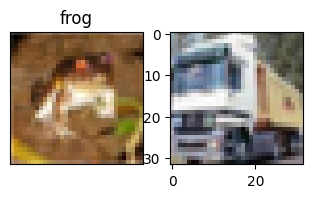

In [12]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap = 'gray')
    plt.title(labels[y_train[i][0]])
    plt.xticks([]);plt.yticks([])

In [15]:
#normalize
x_train = x_train/255
x_test = x_test/255


Build the Model

In [16]:
model = Sequential()

model.add(tf.keras.Input(shape =(32,32,3)))
model.add(Conv2D(filters = 16,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,442 (1.28 MB)

 Trainable params: 334,442 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train,epochs = 10,batch_size=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.4755 - loss: 1.4528
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.6086 - loss: 1.1053
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.6581 - loss: 0.9636
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.6967 - loss: 0.8638
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.7246 - loss: 0.7759
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.7498 - loss: 0.7045
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.7733 - loss: 0.6380
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.7943 - loss: 0.5842
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.8085 - loss: 0.5329
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.8256 - loss: 0.4904


In [20]:
model.evaluate(x_test,y_test,batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.6566 - loss: 1.1658


[1.1657638549804688, 0.6565999984741211]

In [22]:
img = cv2.imread(r"D:\DAIAugust2025\Python\Anurag\OpenCV\datasets\image_dataset\images\dog.jpg",0)

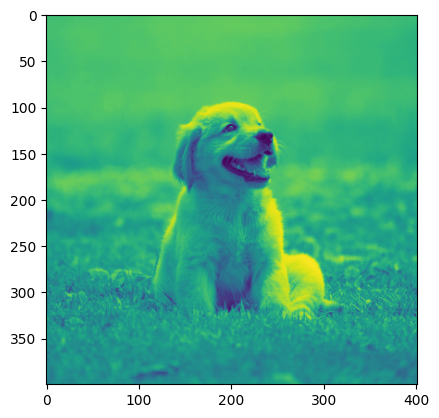

In [25]:
plt.imshow(img)

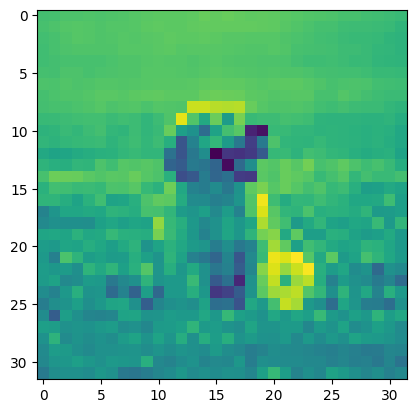

In [26]:
img = cv2.resize(img,(32,32))
img = img/255
img = img / 255
plt.imshow(img)                 

In [ ]:
img = img.reshape(1,32,32,3)
